<img alt="" src="vice1.png"/>

<img alt="" src="vice2.png"/>

<img alt="" src="vice3.png"/>

# Data Preprocessing and Analytics 

In [1]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

#pandas - DataFrames to organize our data
import pandas as pd 
#numpy - linear algebra and matrices for python
import numpy as np  
#matplotlib - workhorse plotting library
import matplotlib.pyplot as plt 
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']
#seaborn - easy plotting for statistical visualizations, based on plt
import seaborn as sns

import re 
import json 

In [2]:
# Suppress all warnings just to keep the notebook nice and clean. 
# This must happen after all imports since numpy actually adds its
# RankWarning class back in.
import warnings
warnings.filterwarnings("ignore")

In [3]:
# data path
datapath1 = ""

In [4]:
# load the  dataframes
data1 = pd.read_csv(datapath1)

In [5]:
# get info 
print('Dataframe dimensions:', data1.shape)
tab_info=pd.DataFrame(data1.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(data1.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(data1.isnull().sum()/data1.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)
display(data1[:2])


Dataframe dimensions: (20080, 10)


,PUBLISHED_DAY,CMS_PAGETITLE,DEK,VERTICAL,AUTHOR,EDITOR,PRIMARY_TOPIC,WORD_COUNT,LOCALE,URL
column type,object,object,object,object,object,object,object,int64,object,object
null values (nb),0,0,52,0,0,0,0,0,0,0
null values (%),0,0,0.258964,0,0,0,0,0,0,0


,PUBLISHED_DAY,CMS_PAGETITLE,DEK,VERTICAL,AUTHOR,EDITOR,PRIMARY_TOPIC,WORD_COUNT,LOCALE,URL
0,2018-10-20,Wave Goodbye to Section Boyz: They're Smoke Bo...,And the UK rap group are back with new project...,Noisey,Noisey UK Staff,Tshepo Mokoena,all the good shit,330,en_au,https://www.vice.com/en_au/article/j539yy/smok...
1,2018-10-02,"La CAQ étant élue, il faudra au minimum 21 ans...",Mais quand la loi va-t-elle changer? C’est enc...,VICE,Justine de l'Église,Sara Barrière-Brunet,Cannabis,478,fr_ca,https://www.vice.com/fr_ca/article/qv9wn5/la-c...


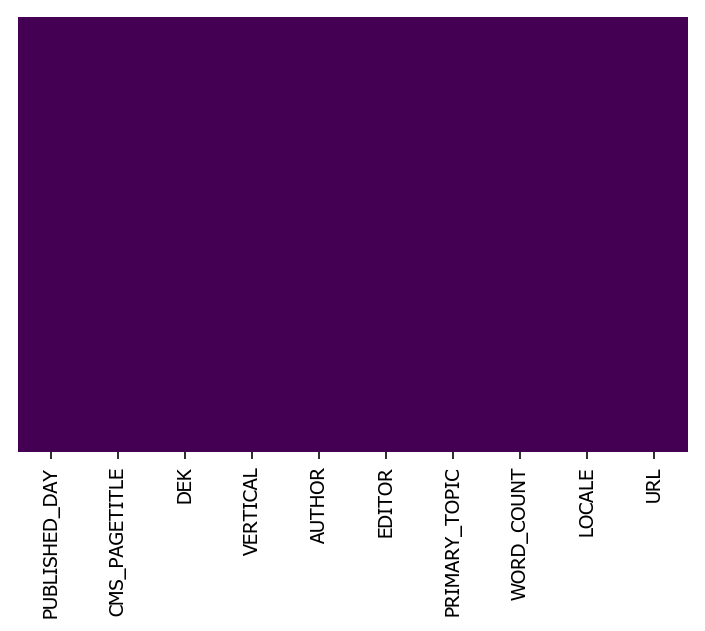

In [6]:
# check for null values 
sns.heatmap(data1.isnull(), yticklabels=False, cbar=False, cmap='viridis') 
plt.show()

## data cleaning

In [7]:
#Rename dataframe columns
data1.columns

Index(['PUBLISHED_DAY', 'CMS_PAGETITLE', 'DEK', 'VERTICAL', 'AUTHOR', 'EDITOR',
       'PRIMARY_TOPIC', 'WORD_COUNT', 'LOCALE', 'URL'],
      dtype='object')

In [8]:
#rename dataframe columns
data1.rename(columns={'PUBLISHED_DAY': 'timestamp', 'CMS_PAGETITLE': 'title', 
                      'DEK': 'dek', 'VERTICAL': 'vertical', 'AUTHOR': 'author', 'EDITOR': 'editor',
                      'PRIMARY_TOPIC': 'topic', 'WORD_COUNT': 'wordcount', 'LOCALE': 'location', 'URL': 'url' }, 
             inplace=True)

In [9]:
data1.columns

Index(['timestamp', 'title', 'dek', 'vertical', 'author', 'editor', 'topic',
       'wordcount', 'location', 'url'],
      dtype='object')

In [10]:
data1.dtypes

timestamp    object
title        object
dek          object
vertical     object
author       object
editor       object
topic        object
wordcount     int64
location     object
url          object
dtype: object

In [11]:
data1.head()

,timestamp,title,dek,vertical,author,editor,topic,wordcount,location,url
0,2018-10-20,Wave Goodbye to Section Boyz: They're Smoke Bo...,And the UK rap group are back with new project...,Noisey,Noisey UK Staff,Tshepo Mokoena,all the good shit,330,en_au,https://www.vice.com/en_au/article/j539yy/smok...
1,2018-10-02,"La CAQ étant élue, il faudra au minimum 21 ans...",Mais quand la loi va-t-elle changer? C’est enc...,VICE,Justine de l'Église,Sara Barrière-Brunet,Cannabis,478,fr_ca,https://www.vice.com/fr_ca/article/qv9wn5/la-c...
2,2018-09-13,When You're Worried a Friend Has an Eating Dis...,Here's how to decide if you should say something.,Tonic,Michelle Malia,Susan Rinkunas,VICE Guide to Life,1181,en_nz,https://www.vice.com/en_nz/article/wjy8en/sign...
3,2018-10-25,10-Year-Old Takes 'Girlfriend' on Nando’s Date...,Gutted.,Munchies,Ruby Lott-Lavigna,Phoebe Hurst,Chicken,333,en_uk,https://www.vice.com/en_uk/article/gyeaqb/10-y...
4,2018-10-29,"Kadang, Orang Bertahan Dalam Hubungan Toxic Cu...","Menurut penelitian, orang yang percaya pasanga...",Tonic,Jesse Hicks,Mike Darling,Percintaan,516,id_id,https://www.vice.com/id_id/article/gyea53/kada...


In [12]:
ts = data1.copy()

# cast to datetime 
ts = ts.assign(timestamp = pd.to_datetime(ts.timestamp))
ts.head()

,timestamp,title,dek,vertical,author,editor,topic,wordcount,location,url
0,2018-10-20,Wave Goodbye to Section Boyz: They're Smoke Bo...,And the UK rap group are back with new project...,Noisey,Noisey UK Staff,Tshepo Mokoena,all the good shit,330,en_au,https://www.vice.com/en_au/article/j539yy/smok...
1,2018-10-02,"La CAQ étant élue, il faudra au minimum 21 ans...",Mais quand la loi va-t-elle changer? C’est enc...,VICE,Justine de l'Église,Sara Barrière-Brunet,Cannabis,478,fr_ca,https://www.vice.com/fr_ca/article/qv9wn5/la-c...
2,2018-09-13,When You're Worried a Friend Has an Eating Dis...,Here's how to decide if you should say something.,Tonic,Michelle Malia,Susan Rinkunas,VICE Guide to Life,1181,en_nz,https://www.vice.com/en_nz/article/wjy8en/sign...
3,2018-10-25,10-Year-Old Takes 'Girlfriend' on Nando’s Date...,Gutted.,Munchies,Ruby Lott-Lavigna,Phoebe Hurst,Chicken,333,en_uk,https://www.vice.com/en_uk/article/gyeaqb/10-y...
4,2018-10-29,"Kadang, Orang Bertahan Dalam Hubungan Toxic Cu...","Menurut penelitian, orang yang percaya pasanga...",Tonic,Jesse Hicks,Mike Darling,Percintaan,516,id_id,https://www.vice.com/id_id/article/gyea53/kada...


In [13]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20080 entries, 0 to 20079
Data columns (total 10 columns):
timestamp    20080 non-null datetime64[ns]
title        20080 non-null object
dek          20028 non-null object
vertical     20080 non-null object
author       20080 non-null object
editor       20080 non-null object
topic        20080 non-null object
wordcount    20080 non-null int64
location     20080 non-null object
url          20080 non-null object
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 1.5+ MB


In [14]:
# str.extract method to extract article ids 
# ([^/]+): groups consecutive non '/' characters
ts["article_id"] = ts.url.str.extract(r"/article/([^/]+)")

In [15]:
ts.head()

,timestamp,title,dek,vertical,author,editor,topic,wordcount,location,url,article_id
0,2018-10-20,Wave Goodbye to Section Boyz: They're Smoke Bo...,And the UK rap group are back with new project...,Noisey,Noisey UK Staff,Tshepo Mokoena,all the good shit,330,en_au,https://www.vice.com/en_au/article/j539yy/smok...,j539yy
1,2018-10-02,"La CAQ étant élue, il faudra au minimum 21 ans...",Mais quand la loi va-t-elle changer? C’est enc...,VICE,Justine de l'Église,Sara Barrière-Brunet,Cannabis,478,fr_ca,https://www.vice.com/fr_ca/article/qv9wn5/la-c...,qv9wn5
2,2018-09-13,When You're Worried a Friend Has an Eating Dis...,Here's how to decide if you should say something.,Tonic,Michelle Malia,Susan Rinkunas,VICE Guide to Life,1181,en_nz,https://www.vice.com/en_nz/article/wjy8en/sign...,wjy8en
3,2018-10-25,10-Year-Old Takes 'Girlfriend' on Nando’s Date...,Gutted.,Munchies,Ruby Lott-Lavigna,Phoebe Hurst,Chicken,333,en_uk,https://www.vice.com/en_uk/article/gyeaqb/10-y...,gyeaqb
4,2018-10-29,"Kadang, Orang Bertahan Dalam Hubungan Toxic Cu...","Menurut penelitian, orang yang percaya pasanga...",Tonic,Jesse Hicks,Mike Darling,Percintaan,516,id_id,https://www.vice.com/id_id/article/gyea53/kada...,gyea53


In [21]:
import datetime 
from dateutil import parser 

In [22]:
ts.index 
ts["weekday"] = ts["timestamp"].dt.weekday
ts["weekday_name"] = ts["timestamp"].dt.weekday_name
ts["time_through_day"] = ts["timestamp"].map(lambda x: x - datetime.datetime.combine(x.date(), datetime.time()))
ts["fraction_through_day"] = ts["time_through_day"].map(lambda x: x / datetime.timedelta(hours = 24))
ts["hours_through_day"] = ts["fraction_through_day"] * 24
ts["days_through_week"] = ts.apply(lambda row: row["weekday"] + row["fraction_through_day"], axis = 1)
ts["fraction_through_week"] = ts["days_through_week"] / 24

RangeIndex(start=0, stop=20080, step=1)

In [23]:
ts.head()

,timestamp,title,dek,vertical,author,editor,topic,wordcount,location,url,article_id,article_uniquecount,weekday,weekday_name,time_through_day,fraction_through_day,hours_through_day,days_through_week,fraction_through_week
0,2018-10-20,Wave Goodbye to Section Boyz: They're Smoke Bo...,And the UK rap group are back with new project...,Noisey,Noisey UK Staff,Tshepo Mokoena,all the good shit,330,en_au,https://www.vice.com/en_au/article/j539yy/smok...,j539yy,10356,5,Saturday,0 days,0.0,0.0,5.0,0.208333
1,2018-10-02,"La CAQ étant élue, il faudra au minimum 21 ans...",Mais quand la loi va-t-elle changer? C’est enc...,VICE,Justine de l'Église,Sara Barrière-Brunet,Cannabis,478,fr_ca,https://www.vice.com/fr_ca/article/qv9wn5/la-c...,qv9wn5,10356,1,Tuesday,0 days,0.0,0.0,1.0,0.041667
2,2018-09-13,When You're Worried a Friend Has an Eating Dis...,Here's how to decide if you should say something.,Tonic,Michelle Malia,Susan Rinkunas,VICE Guide to Life,1181,en_nz,https://www.vice.com/en_nz/article/wjy8en/sign...,wjy8en,10356,3,Thursday,0 days,0.0,0.0,3.0,0.125000
3,2018-10-25,10-Year-Old Takes 'Girlfriend' on Nando’s Date...,Gutted.,Munchies,Ruby Lott-Lavigna,Phoebe Hurst,Chicken,333,en_uk,https://www.vice.com/en_uk/article/gyeaqb/10-y...,gyeaqb,10356,3,Thursday,0 days,0.0,0.0,3.0,0.125000
4,2018-10-29,"Kadang, Orang Bertahan Dalam Hubungan Toxic Cu...","Menurut penelitian, orang yang percaya pasanga...",Tonic,Jesse Hicks,Mike Darling,Percintaan,516,id_id,https://www.vice.com/id_id/article/gyea53/kada...,gyea53,10356,0,Monday,0 days,0.0,0.0,0.0,0.000000


In [24]:
print("Earliest Date:",ts.timestamp.min(), "\n", "Latest Date:",ts.timestamp.max(), "\n",  \
"Number of days in between them:", ts.timestamp.max() - ts.timestamp.min())

Earliest Date: 2018-09-01 00:00:00 
 Latest Date: 2018-11-01 00:00:00 
 Number of days in between them: 61 days 00:00:00


In [25]:
ts['year'] = pd.DatetimeIndex(ts['timestamp']).year

In [26]:
ts['month'] = pd.DatetimeIndex(ts['timestamp']).month

In [27]:
ts['day'] = pd.DatetimeIndex(ts['timestamp']).day

In [28]:
ts.head()

,timestamp,title,dek,vertical,author,editor,topic,wordcount,location,url,...,weekday,weekday_name,time_through_day,fraction_through_day,hours_through_day,days_through_week,fraction_through_week,year,month,day
0,2018-10-20,Wave Goodbye to Section Boyz: They're Smoke Bo...,And the UK rap group are back with new project...,Noisey,Noisey UK Staff,Tshepo Mokoena,all the good shit,330,en_au,https://www.vice.com/en_au/article/j539yy/smok...,...,5,Saturday,0 days,0.0,0.0,5.0,0.208333,2018,10,20
1,2018-10-02,"La CAQ étant élue, il faudra au minimum 21 ans...",Mais quand la loi va-t-elle changer? C’est enc...,VICE,Justine de l'Église,Sara Barrière-Brunet,Cannabis,478,fr_ca,https://www.vice.com/fr_ca/article/qv9wn5/la-c...,...,1,Tuesday,0 days,0.0,0.0,1.0,0.041667,2018,10,2
2,2018-09-13,When You're Worried a Friend Has an Eating Dis...,Here's how to decide if you should say something.,Tonic,Michelle Malia,Susan Rinkunas,VICE Guide to Life,1181,en_nz,https://www.vice.com/en_nz/article/wjy8en/sign...,...,3,Thursday,0 days,0.0,0.0,3.0,0.125000,2018,9,13
3,2018-10-25,10-Year-Old Takes 'Girlfriend' on Nando’s Date...,Gutted.,Munchies,Ruby Lott-Lavigna,Phoebe Hurst,Chicken,333,en_uk,https://www.vice.com/en_uk/article/gyeaqb/10-y...,...,3,Thursday,0 days,0.0,0.0,3.0,0.125000,2018,10,25
4,2018-10-29,"Kadang, Orang Bertahan Dalam Hubungan Toxic Cu...","Menurut penelitian, orang yang percaya pasanga...",Tonic,Jesse Hicks,Mike Darling,Percintaan,516,id_id,https://www.vice.com/id_id/article/gyea53/kada...,...,0,Monday,0 days,0.0,0.0,0.0,0.000000,2018,10,29


In [29]:
ts.columns

Index(['timestamp', 'title', 'dek', 'vertical', 'author', 'editor', 'topic',
       'wordcount', 'location', 'url', 'article_id', 'article_uniquecount',
       'weekday', 'weekday_name', 'time_through_day', 'fraction_through_day',
       'hours_through_day', 'days_through_week', 'fraction_through_week',
       'year', 'month', 'day'],
      dtype='object')

In [30]:
ts.select_dtypes('object').columns

Index(['title', 'dek', 'vertical', 'author', 'editor', 'topic', 'location',
       'url', 'article_id', 'weekday_name'],
      dtype='object')

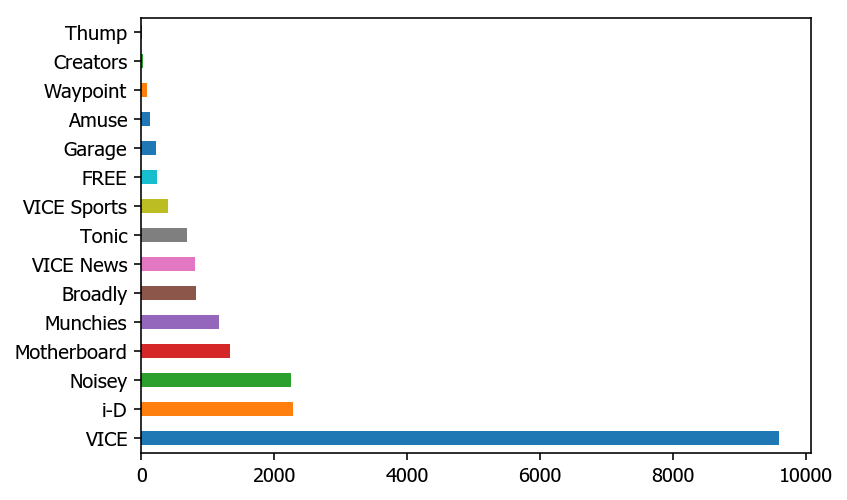

In [31]:
ts.vertical.value_counts().plot(kind='barh')

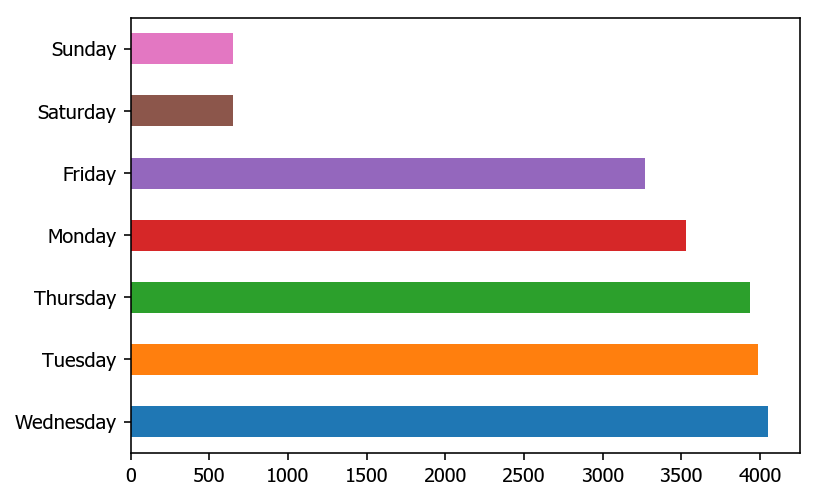

In [32]:
ts.weekday_name.value_counts().plot(kind='barh')

In [39]:
ts.vertical.value_counts()

VICE           9597
i-D            2288
Noisey         2259
Motherboard    1337
Munchies       1169
Broadly         817
VICE News       812
Tonic           683
VICE Sports     407
FREE            241
Garage          222
Amuse           128
Waypoint         89
Creators         24
Thump             7
Name: vertical, dtype: int64

In [40]:
ts.location.value_counts()

en_us       4229
en_uk       1564
en_au       1465
en_ca       1418
es_latam    1125
en_nz        874
it           857
de           713
es_mx        642
ro           607
nl           587
en_asia      518
rs           513
id_id        465
pt_br        451
es           439
gr           414
en_in        405
fr           378
da           347
de_ch        310
de_at        269
jp           217
fr_ca        207
pt           205
be           177
ar           167
fr_be        160
pl           136
alps         133
sv            48
ru            40
Name: location, dtype: int64

In [41]:
# number of unique articles published 
ts.article_id.nunique()

10356

In [43]:
# articles published per month 
ts.month.value_counts()

10    10406
9      9285
11      389
Name: month, dtype: int64

In [47]:
# top topics are unkown, fashion, the vice guide to right now and news 
ts.topic.value_counts()

Unknown                        908
Fashion                        612
The VICE Guide to Right Now    611
News                           558
Culture                        447
Cultura                        269
Music                          243
Film                           239
La Guía VICE al ahora          172
Australia Today                171
Interviews                     170
Premieres                      169
Noisey News                    164
Views My Own                   155
Art                            137
New music                      135
Internet                       124
VICE Guide to Life             119
VICE News Tonight on HBO       115
Weed                           104
Broadly                        104
Munchies                       104
Astro Guide                    101
Photography                    101
Política                       100
Drugs                           94
Notícias                        92
Moda                            87
crime               

In [37]:
import plotly.express as px

In [38]:
import plotly.graph_objects as go

In [49]:
#We need to setup the index of our DataFrame to the date column. 
#We do this by calling index on the Pandas DataFrame and assigning it
#the date series. We also delete the date column as we don't need it separately from the index.
ts.index = ts['timestamp']
del ts['timestamp']

In [50]:
import os, json
import glob
pd.set_option('display.max_columns', None)

temp = pd.DataFrame()

path_to_json = '/Users/emyhr/fb_data/*' 

json_pattern = os.path.join(path_to_json,'*.json')
file_list = glob.glob(json_pattern)

for file in file_list:
    data = pd.read_json(file, lines=True)
    temp = temp.append(data, ignore_index = True)

In [51]:
temp.head()

,asof_date,comments_total_count,created_time,from_id,from_name,id,link,name,post_consumptions,post_consumptions_by_type,post_consumptions_by_type_unique,post_consumptions_unique,post_engaged_fan,post_engaged_users,post_engagements,post_fan_reach,post_impressions,post_impressions_by_paid_non_paid,post_impressions_by_paid_non_paid_unique,post_impressions_by_story_type,post_impressions_by_story_type_unique,post_impressions_fan,post_impressions_fan_paid,post_impressions_fan_paid_unique,post_impressions_fan_unique,post_impressions_organic,post_impressions_organic_unique,post_impressions_paid,post_impressions_paid_unique,post_impressions_unique,post_impressions_viral,post_impressions_viral_unique,post_interests_consumptions,post_interests_consumptions_by_type_unique,post_interests_consumptions_unique,post_interests_impressions,post_interests_impressions_unique,post_negative_feedback,post_negative_feedback_by_type,post_negative_feedback_by_type_unique,post_reactions_anger_total,post_reactions_by_type_total,post_reactions_haha_total,post_reactions_like_total,post_reactions_love_total,post_reactions_sorry_total,post_reactions_wow_total,post_video_avg_time_watched,post_video_complete_views_organic,post_video_complete_views_organic_unique,post_video_complete_views_paid,post_video_complete_views_paid_unique,post_video_length,post_video_retention_graph_autoplayed,post_video_retention_graph_clicked_to_play,post_video_view_time,post_video_view_time_by_age_bucket_and_gender,post_video_view_time_by_country_id,post_video_view_time_by_distribution_type,post_video_view_time_by_region_id,post_video_view_time_organic,post_video_views,post_video_views_10s,post_video_views_10s_autoplayed,post_video_views_10s_clicked_to_play,post_video_views_10s_organic,post_video_views_10s_paid,post_video_views_10s_sound_on,post_video_views_10s_unique,post_video_views_autoplayed,post_video_views_by_distribution_type,post_video_views_clicked_to_play,post_video_views_organic,post_video_views_organic_unique,post_video_views_paid,post_video_views_paid_unique,post_video_views_sound_on,post_video_views_unique,shares,shares.count
0,2018-03-02-000,0,2018-03-01 23:30:15,814185111976252,Broadly,8.141851e+30,https://noisey.vice.com/en_ca/article/zmwgm8/a...,Alice Glass Says Ethan Kath's Defamation Suit ...,60,"{'other clicks': 14, 'link clicks': 46}","{'other clicks': 12, 'link clicks': 41}",51,54,55,68,2301,2757,"{'total': 2757, 'unpaid': 2757, 'paid': 0}","{'total': 2360, 'unpaid': 2360, 'paid': 0}",{'other': 18},{'other': 12},2683,0,0,2301,2739,2347,0,0,2360,18,12,{},"{'video play': {}, 'other clicks': {}, 'photo ...",{},{},{},1,{'hide_clicks': 1},{'hide_clicks': 1},0,"{'like': 8, 'love': 0, 'wow': 0, 'haha': 0, 's...",0,8,0,0,0,0,0,0,0,0,0,{},{},0,{},{},{},{},0,0,0,0,0,0,0,0,0,0,{},0,0,0,0,0,0,0,0,NaN
1,2018-03-02-000,1,2018-03-01 22:30:37,814185111976252,Broadly,8.141851e+30,https://munchies.vice.com/en_us/article/xw5mj4...,Johnnie Walker's 'Jane Walker' Campaign Is the...,99,"{'other clicks': 48, 'link clicks': 51}","{'other clicks': 41, 'link clicks': 50}",84,85,88,108,4340,5361,"{'total': 5361, 'unpaid': 5361, 'paid': 0}","{'total': 4487, 'unpaid': 4487, 'paid': 0}",{'other': 41},{'other': 32},5203,0,0,4340,5320,4451,0,0,4487,41,32,{},"{'video play': {}, 'other clicks': {}, 'photo ...",{},{},{},1,{'hide_clicks': 1},{'hide_clicks': 1},2,"{'like': 2, 'love': 0, 'wow': 0, 'haha': 2, 's...",2,2,0,0,0,0,0,0,0,0,0,{},{},0,{},{},{},{},0,0,0,0,0,0,0,0,0,0,{},0,0,0,0,0,0,0,0,2.0
2,2018-03-02-000,1,2018-03-01 21:30:29,814185111976252,Broadly,8.141851e+30,https://broadly.vice.com/en_us/article/8xd7nz/...,Social Media Do's and Don'ts with Trixie and B...,93,"{'other clicks': 26, 'link clicks': 67}","{'other clicks': 20, 'link clicks': 67}",82,83,86,102,3612,4627,"{'total': 4627, 'unpaid': 4627, 'paid': 0}","{'total': 3770, 'unpaid': 3770, 'paid': 0}",{'other': 43},{'other': 34},4466,0,0,3612,4584,3739,0,0,3770,43,34,{},"{'video play': {}, 'other clicks': {}, 'photo ...",{},{},{},1,

In [52]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 80 columns):
asof_date                                        3001 non-null object
comments_total_count                             3001 non-null int64
created_time                                     3001 non-null datetime64[ns]
from_id                                          3001 non-null int64
from_name                                        3001 non-null object
id                                               3001 non-null float64
link                                             2994 non-null object
name                                             2979 non-null object
post_consumptions                                3001 non-null int64
post_consumptions_by_type                        3001 non-null object
post_consumptions_by_type_unique                 3001 non-null object
post_consumptions_unique                         3001 non-null int64
post_engaged_fan                                

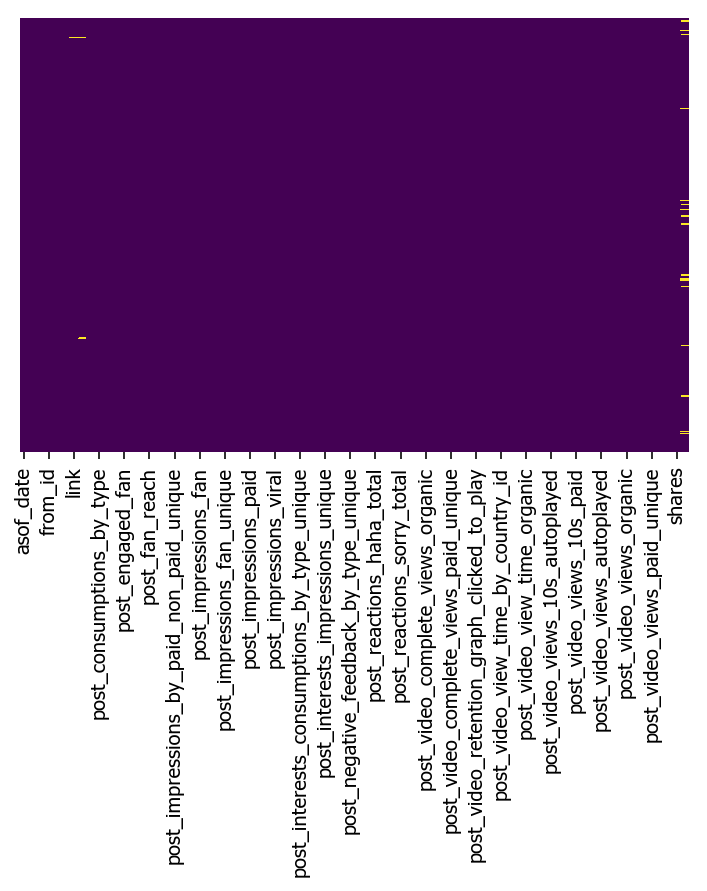

In [53]:
# check for null values 
sns.heatmap(temp.isnull(), yticklabels=False, cbar=False, cmap='viridis') 
plt.show()

In [55]:
# find number of unique ids 
temp.id.nunique()

18

In [56]:
# find count of links shared ordered by highest links share
temp.link.value_counts()

https://www.facebook.com/CutestJobs/videos/404115606681274/                                                                                                   18
https://www.facebook.com/BroadlyTV/videos/1696987040362717/                                                                                                   16
https://www.facebook.com/bluntedvice/videos/1770988129624485/                                                                                                 13
https://motherboard.vice.com/en_us/article/9kz87z/bigodicky-robotic-bra-sex-toy-on-indiegogo-is-the-weirdest-sex-toy-ive-ever-seen?utm_source=mbfb            12
https://motherboard.vice.com/en_us/article/xw5k5z/vrchat-added-panic-button-to-deal-with-porn-trolls?utm_source=mbfb                                          12
https://broadly.vice.com/en_us/article/pam8by/seven-beauties-lina-wertmuller-female-best-director-oscars?utm_source=broadlyfbus                               12
https://motherboard.vice.com/en_us

In [58]:
# find the number of unique links shared 
temp.link.nunique()

592

# Visualizations of Data

Continued figures will be updated using plotly interactive graphics 